<a href="https://colab.research.google.com/github/okana2ki/multiV/blob/main/senkei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

このノートブックは、以下からダウンロードしたものを改変したものです：

[高等学校における「情報II」のためのデータサイエンス・データ解析入門](https://www.stat.go.jp/teacher/comp-learn-04.html)（総務省統計局）


## 1.線形回帰

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

データを読み込みます。  

データ内容は以下の通りです。

ID：ID  
sales：売上個数  
insta_post：Instagram投稿数  
insta_good：Instagramいいね！数  
flyer：チラシ配布枚数  
event：イベントあり＝１、イベントなし＝０  
new_item：新作発売日＝１  
holiday：土日祝＝１

In [2]:
df = pd.read_csv("senkei.csv", index_col=0) # ← データファイルのパスを正しく指定して下さい。
df.head()

,sales,insta_post,insta_good,flyer,event,new_item,holiday
ID,,,,,,,
1,62,0,20,0,0,0,0
2,60,0,24,0,0,0,0
3,104,0,26,0,0,0,0
4,102,0,22,0,0,0,0
5,178,0,39,0,0,0,1


↑Colab AIが次のステップとして提案してきた「Generate code with df」や「View recommended plots」をクリックしてみよう！

### 単回帰分析

説明変数をinsta_good、目的変数をsalesとして、単回帰分析を行います。

In [3]:
# 説明変数insta_good
X = df.iloc[:, 2].values  # ← Colab AIで教えてもらおう
X = X.reshape(-1,1)  # reshapeでどのような変換をしているか？なぜそれが必要か？Colab AIに尋ねてみましょう

# 目的変数sales
Y = df.iloc[:, 0].values

以下のプログラムもColab AIで教えてもらおう

In [5]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()

# 予測モデルを作成
clf.fit(X, Y)

# 回帰係数
print(clf.coef_)

# 切片
print(clf.intercept_)

# 決定係数
print(clf.score(X, Y))

[2.05852128]
101.71515440413765
0.5218980221448157


insta_goodの回帰係数と、単回帰の式の切片が分かりました。  
決定係数は、0～1の範囲の値をとり、値が大きいほどモデルが適切にデータを表現できているといえます。

対応する散布図を作成し、回帰直線を描き加えてみましょう。

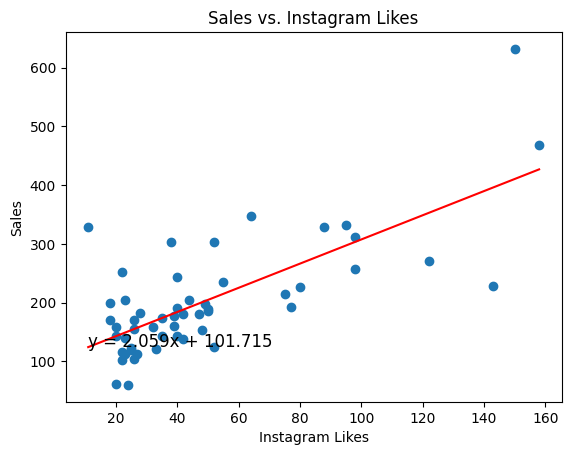

In [6]:
# prompt: salesとinsta_goodの散布図を作成し、単回帰分析の回帰式を散布図に書き加えて下さい。

# 散布図を作成
plt.scatter(X, Y)

# 回帰直線を作成
x_min, x_max = X.min(), X.max()
y_min = clf.predict([[x_min]])
y_max = clf.predict([[x_max]])

# 回帰直線を散布図に追加
plt.plot([x_min, x_max], [y_min, y_max], color="r")

# 回帰式の切片と回帰係数を散布図に書き加える
plt.text(x_min, y_min, f"y = {clf.coef_[0]:.3f}x + {clf.intercept_:.3f}", fontsize=12)

# グラフのタイトルとラベルを設定
plt.title("Sales vs. Instagram Likes")
plt.xlabel("Instagram Likes")
plt.ylabel("Sales")

# グラフを表示
plt.show()


### 重回帰分析

insta_post以降6カラムを説明変数、目的変数をsalesとして、重回帰分析を行います。

In [9]:
# 説明変数
X = df.iloc[:, 1:7].values

# 目的変数
Y = df.iloc[:, 0].values

In [12]:
# 予測モデルを作成
clf.fit(X, Y)

# 偏回帰係数
df_except_sales = df.iloc[:, 1:7]
print(pd.DataFrame({"Name":df_except_sales.columns,
                    "Coefficients":clf.coef_}))

# 切片
print(clf.intercept_)

         Name  Coefficients
0  insta_post     48.871107
1  insta_good      0.684993
2       flyer      0.206098
3       event    245.436745
4    new_item    -38.905751
5     holiday     26.549665
131.89410662096918


各変数の偏回帰係数と重回帰の式の切片が分かりました。

各変数がどの程度目的変数に影響しているかを**比較**する（**他の変数と比べて**どれくらい影響しているかを知る）には、各変数を**標準化**（平均を0、分散を1に揃える）します。

In [13]:
# データフレームの各列を標準化
df2 = df.apply(lambda x: (x - np.mean(x)) / np.std(x))
df2.head()

,sales,insta_post,insta_good,flyer,event,new_item,holiday
ID,,,,,,,
1,-1.427147,-0.322749,-0.839503,-0.511766,-0.138675,-0.19803,-0.657596
2,-1.447439,-0.322749,-0.723860,-0.511766,-0.138675,-0.19803,-0.657596
3,-1.001013,-0.322749,-0.666038,-0.511766,-0.138675,-0.19803,-0.657596
4,-1.021305,-0.322749,-0.781681,-0.511766,-0.138675,-0.19803,-0.657596
5,-0.250205,-0.322749,-0.290198,-0.511766,-0.138675,-0.19803,1.520691


In [16]:
# 説明変数
X = df2.iloc[:, 1:7].values

# 目的変数
Y = df2.iloc[:, 0].values

In [17]:
# 予測モデルを作成
clf.fit(X, Y)

# 標準化偏回帰係数
df2_except_sales = df2.iloc[:, 1:7]
print(pd.DataFrame({"Name":df2_except_sales.columns,
                    "Coefficients":clf.coef_}))

# 切片
print(clf.intercept_)

         Name  Coefficients
0  insta_post      0.144937
1  insta_good      0.240394
2       flyer      0.424020
3       event      0.338815
4    new_item     -0.075220
5     holiday      0.123663
1.713800285331052e-17


In [18]:
# 予測モデルを作成
clf.fit(X, Y)

# 標準化偏回帰係数の絶対値をとって昇順にソート
df2_except_sales = df2.iloc[:, 1:7]
print(pd.DataFrame({"Name":df2_except_sales.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients'))

# 切片
print(clf.intercept_)

         Name  Coefficients
4    new_item      0.075220
5     holiday      0.123663
0  insta_post      0.144937
1  insta_good      0.240394
3       event      0.338815
2       flyer      0.424020
1.713800285331052e-17


標準化後の各変数の偏回帰係数と重回帰の式の切片が分かりました。

**標準化偏回帰係数の絶対値**によって、売上個数への**各変数の相対的な影響の強さ**を確認することができます。

### 線形回帰（教師あり学習）

学習用データとテストデータを用いて、線形回帰（重回帰分析）を行います。  
先程、標準化したデータを使います。

In [19]:
# 説明変数
X = df2.iloc[:, 1:7].values

# 目的変数
Y = df2.iloc[:, 0].values

#学習用データとテスト用データを7:3に分割する
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [20]:
# 予測モデルを作成
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

# 標準化偏回帰係数
df2_except_sales = df2.iloc[:, 1:7]
print(pd.DataFrame({"Name":df2_except_sales.columns,
                    "Coefficients":model.coef_}).sort_values(by='Coefficients') )

# 切片
print(model.intercept_)

         Name  Coefficients
4    new_item     -0.275375
5     holiday      0.114375
0  insta_post      0.124747
1  insta_good      0.192751
3       event      0.355778
2       flyer      0.439931
0.0024609653248596555


学習データにおける各変数の標準化偏回帰係数と重回帰の式の切片が分かりました。  

訓練データとテストデータのそれぞれに対して、予測値と実測値の平均二乗誤差を求めてみます。

In [21]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print('訓練データに対する平均二乗誤差＝{:0.2f}'.format(np.mean((np.array(Y_train, dtype = int) - pred_train) ** 2)))
print('テストデータに対する平均二乗誤差＝{:0.2f}'.format(np.mean((np.array(Y_test, dtype = int) - pred_test) ** 2)))

訓練データに対する平均二乗誤差＝0.26
テストデータに対する平均二乗誤差＝0.37


また、残差プロット（横軸に予測値、縦軸に実際の値との差をプロットしたもの）をプロットします。
残差プロットは、y=0の水平線に近いほど、良い精度のデータといえます

Text(0.5, 1.0, 'Residual Plots')

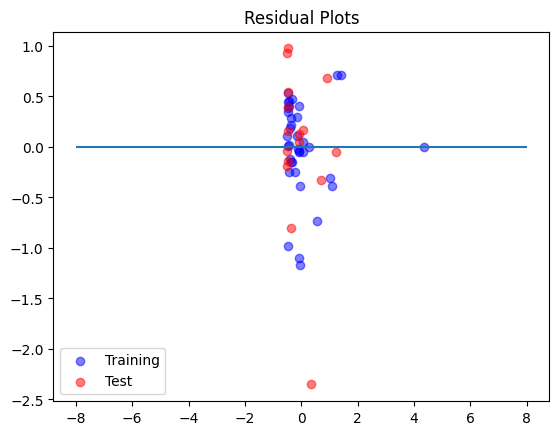

In [22]:
# 学習用データの残差プロット
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# テスト用データの残差プロット
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# y=0の水平線
plt.hlines(y=0,xmin=-8,xmax=8)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')